In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from pyclustering.utils.metric import distance_metric, type_metric

from yellowbrick.cluster import KElbowVisualizer


import utils
from common import *
from estimators import *
from projection import *
import heartdisease

rng = 104582

In [2]:
df_X, df_y = heartdisease.load_dataset()
df = pd.concat([df_X, df_y], axis=1)
print(df.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak    IsMale  \
0 -1.433140   0.328423     0.567911  -0.551341  1.382928 -0.855375  0.515952   
1 -0.478484   0.964113     0.348389  -0.551341  0.754157  0.224868 -1.938163   
2 -1.751359  -0.024121     0.558175  -0.551341 -1.525138 -0.855375  0.515952   
3 -0.584556   0.259958     0.428555  -0.551341 -1.132156  0.679595 -1.938163   
4  0.051881   0.656800     0.385467  -0.551341 -0.581981 -0.855375  0.515952   

   HasExerciseAngina  ChestPainType_TA  ChestPainType_ATA  ChestPainType_NAP  \
0          -0.823556         -0.229679           2.075177          -0.532838   
1          -0.823556         -0.229679          -0.481887           1.876744   
2          -0.823556         -0.229679           2.075177          -0.532838   
3           1.214246         -0.229679          -0.481887          -0.532838   
4          -0.823556         -0.229679          -0.481887           1.876744   

   RestingECG_ST  RestingECG_LVH  IsST

In [3]:
#estimator_generator = KMeansEstimatorGenerator(random_state=rng)

#metric = distance_metric(type_metric.MANHATTAN) 
#metric = distance_metric(type_metric.EUCLIDEAN_SQUARE)
metric = distance_metric(type_metric.EUCLIDEAN)
#metric = distance_metric(type_metric.CHEBYSHEV)


estimator_generator = PyclusterKMeansEstimatorGenerator(metric=metric, random_state=rng)
#silhouette_score_analysis(df_X, estimator_generator, max_clusters=10, ncols=5, figsize=(20,20))

#estimator_generator = KMeansEstimatorGenerator(random_state=rng)
#elbow_plot_analysis(df_X, estimator_generator, max_clusters=10)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


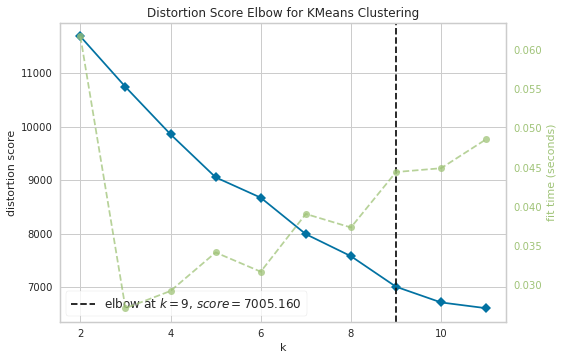

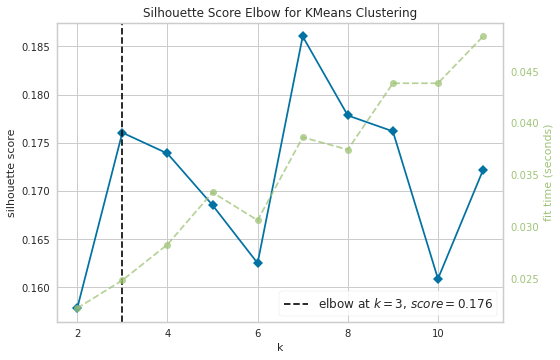

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [4]:

visualizer = KElbowVisualizer(KMeans(random_state=rng), k=(2,12))
visualizer.fit(df_X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

visualizer = KElbowVisualizer(KMeans(random_state=rng), k=(2,12), metric='silhouette')
visualizer.fit(df_X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [5]:
kmeans = PyclusterKMeansEstimator(n_clusters=2, random_state=rng)
kmeans.fit(df_X)

In [6]:
# clusters = torch.as_tensor(kmeans.cluster_centers).float()
# x1 = torch.as_tensor(df_X.values).float()
# #x1 = torch.cat([x1, clusters])

# visualizer = MultivariableClusterVisualizer(Projector(x1.shape[1]))
# visualizer.fit(x1)
# visualizer.render(torch.tensor(df_X.to_numpy()).float(), kmeans)

[0.19933691 0.10469105 0.0870876  0.07892723]


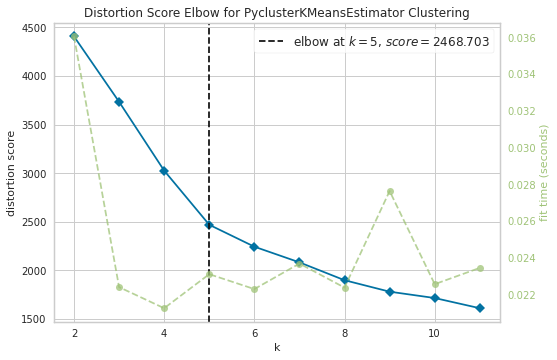

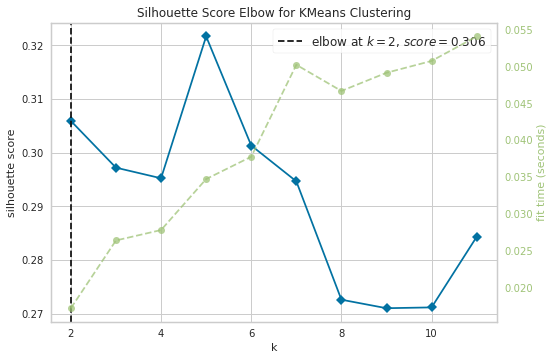

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [14]:
pca = PCA(n_components=0.4)
pca_X = pca.fit_transform(df_X)
print(pca.explained_variance_ratio_)

estimator_generator = PyclusterKMeansEstimatorGenerator(metric=metric, random_state=rng)
#silhouette_score_analysis(pca_X, estimator_generator, max_clusters=10, ncols=5, figsize=(20,20))
#elbow_plot_analysis(pca_X, estimator_generator, max_clusters=100)

visualizer = KElbowVisualizer(PyclusterKMeansEstimator(random_state=rng), k=(2,12))
visualizer.fit(pca_X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

visualizer = KElbowVisualizer(KMeans(random_state=rng), k=(2,12), metric='silhouette')
visualizer.fit(pca_X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

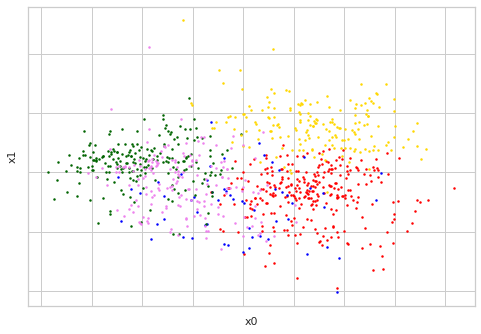

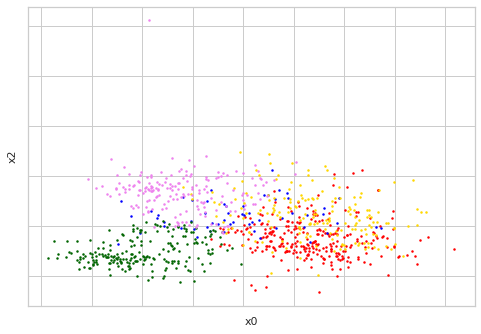

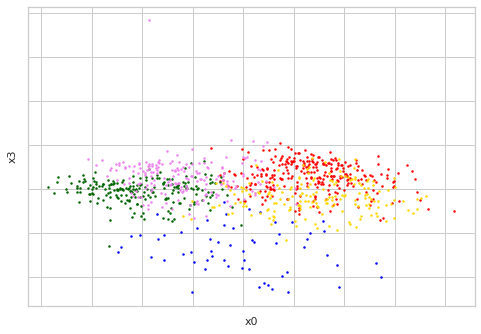

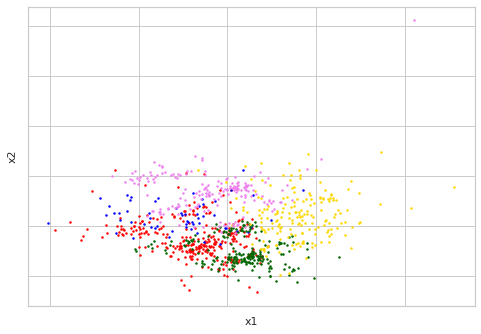

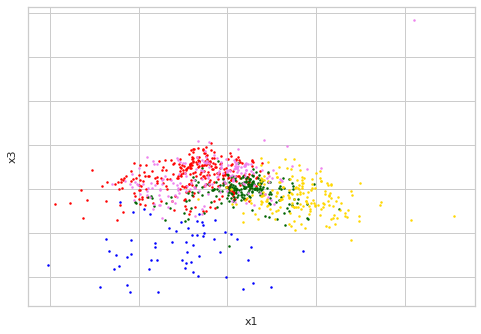

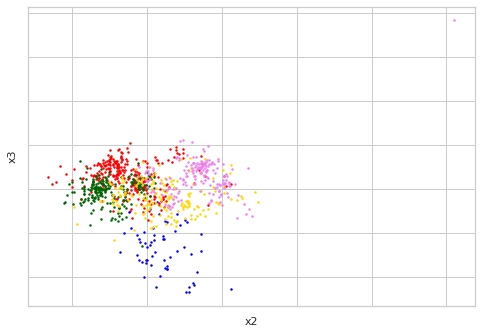

In [17]:
kmeans = PyclusterKMeansEstimator(n_clusters=5, random_state=rng)
kmeans.fit(pca_X)

for i1, i2 in itertools.combinations(range(pca_X.shape[1]), 2):
    kmeans.visualize(pca_X, pair_filter=[
        [i1, i2]
    ])

In [9]:
# clusters = torch.as_tensor(kmeans.cluster_centers).float()
# x1 = torch.as_tensor(pca_X).float()
# #x1 = torch.cat([x1, clusters])

# visualizer = MultivariableClusterVisualizer(Projector(x1.shape[1]))
# visualizer.fit(x1)
# visualizer.render(torch.tensor(pca_X).float(), kmeans)